In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
from datetime import timedelta

## Life Cycle of This Project
1. Project Initiation
2. Data Collection
3. Data Cleaning
4. Data Preparation
5. RFM Scoring
6. Segmentation
7. Visualization


### 1.Problem Statment

This Project aim to increase sales and optimize inconsistent sales performance and customer engagement and understand customerpurchasing behavior to optimize markting strategies and improve customer retention and increase overall sales .

### 2. Data Collection

In [5]:
# Lodaing the dataset into dataframe
data = pd.read_csv('online_retail.csv')

# showing first 5 rows 
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
## Rows and Columns 
data.shape

(541909, 8)

In [7]:
## Five Point Summary 
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


* There is negative Values this indicate cancelled items we need to remove thos items

### 3. Data Cleaning
1. Data type
2. Missing Values
3. Duplicated Values
4. All The Numerical Variables 
5. Distribution of numerical variables
6. categorical variables 
7. Cardinalty of Categorical Variables
8. Outliers

In [10]:
## Checking for Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


* Convert InvoiceDate Into datetime

In [12]:
## Missing values
# create var for numercial features
numerical_var = data.select_dtypes(exclude="O").columns

# create var for Categorical features
categorical_var = data.select_dtypes(include="O").columns

In [13]:
# Checking for missing values
num_var_nun = [col for col in data[numerical_var] if data[col].isnull().sum()]

cat_var_nun = [col for col in data[categorical_var] if data[col].isnull().sum()]

In [14]:
# Percentage of missing values 
for col in num_var_nun:
    print(f"{col} : {np.round(data[col].isnull().mean(),2)}% Missing Values")

CustomerID : 0.25% Missing Values


In [15]:
for col in cat_var_nun:
    print(f"{col} : {np.round(data[col].isnull().mean(),3)}%")

Description : 0.003%


* Missing Values In 2 Columns CustomerID and Description

In [17]:
## Duplicated Values
duplicated_values = data[data.duplicated]
duplicated_values.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


* Same invoice has many items so we cant say this duplicated values

In [19]:
## Cardinalty of Categorical Variables
for i in categorical_var :
    print(f"{i} : {data[i].nunique()} Labels")

InvoiceNo : 25900 Labels
StockCode : 4070 Labels
Description : 4223 Labels
InvoiceDate : 23260 Labels
Country : 38 Labels


<Axes: ylabel='UnitPrice'>

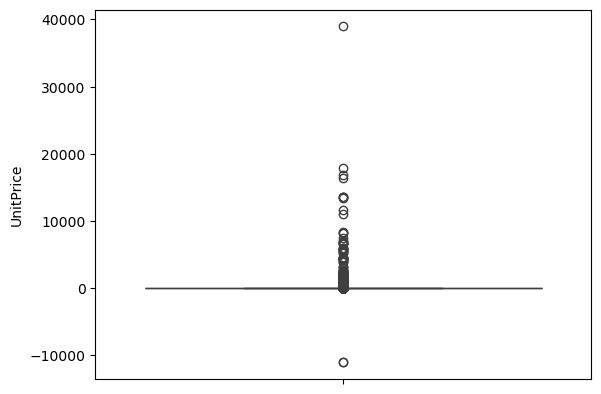

In [20]:
## Checking for outliers
sns.boxplot(data['UnitPrice'])

* There is Huge number of outliers

#### 4.Data Preparation


In [23]:
## Drop missing values
new_df = data.dropna(ignore_index=True)
print(f"data shape after drop na {new_df.shape}")

data shape after drop na (406829, 8)


In [24]:
# Filter out unit price = 0
new_df[new_df['UnitPrice'] == 0 ].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7012,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
23071,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
26046,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
29881,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
29883,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


In [25]:
## Filter out cancelled order
new_df[new_df['InvoiceNo'].str.contains('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [26]:
## final Data
final_df = new_df[new_df['UnitPrice'] !=0]

final_df = final_df[~final_df['InvoiceNo'].str.contains('C')]

In [27]:
print(f'Data befor prepartion is {data.shape} final data shape is {final_df.shape}')

Data befor prepartion is (541909, 8) final data shape is (397884, 8)


In [28]:
## Add new column for total amount
final_df['Total Amount'] = final_df['Quantity'] * final_df['UnitPrice']
final_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [29]:
## Convet InvoiceDate into datetime
final_df['InvoiceDate'] = pd.to_datetime(final_df['InvoiceDate'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 406828
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397884 non-null  object        
 1   StockCode     397884 non-null  object        
 2   Description   397884 non-null  object        
 3   Quantity      397884 non-null  int64         
 4   InvoiceDate   397884 non-null  datetime64[ns]
 5   UnitPrice     397884 non-null  float64       
 6   CustomerID    397884 non-null  float64       
 7   Country       397884 non-null  object        
 8   Total Amount  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [30]:
## create refrence date
refrence_date = dt.now().date()
refrence_date

datetime.date(2024, 11, 21)

In [31]:
refrence_date = final_df['InvoiceDate'].max() + timedelta(days = 22)

#### 5.RFM Scoring

1. Recency: Days since the last purchase.

2. Frequency: Number of purchases.

3. Monetary: Total amount spent.

In [33]:
rfm = final_df.groupby('CustomerID').agg(
    {
        'InvoiceDate' : lambda x:(refrence_date - x.max()).days , ## Recency

        'InvoiceNo' : 'nunique' , # number of invoice for each customer

        'Total Amount' : 'sum' ## total value for each customer
        
    }
)

In [34]:
rfm.head()

,InvoiceDate,InvoiceNo,Total Amount
CustomerID,,,
12346.0,347,1,77183.60
12347.0,23,7,4310.00
12348.0,96,4,1797.24
12349.0,40,1,1757.55
12350.0,331,1,334.40


In [35]:
## rename the column into recency frequancy and monetary
rfm = rfm.rename(columns={'InvoiceDate' : 'Recency' , 'InvoiceNo' : 'Frequency' , 'Total Amount' : 'Monetary'})

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,23,7,4310.00
12348.0,96,4,1797.24
12349.0,40,1,1757.55
12350.0,331,1,334.40


In [36]:
quantiles = rfm.quantile(q=[0.25,0.50,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,39.0,1.0,307.415
0.50,72.0,2.0,674.485
0.75,163.0,5.0,1661.740


In [37]:
## Assigen rfm score
def RScore(x , p , d): # p for columns recency frequency monetary d for quantiles
    if p == 'Recency' :
        if x <= d[p][0.25]:
            return 4
        elif x <= d[p][0.50]:
            return 3
        elif x <= d[p][0.75]:
            return 2
        else :
            return 1
    else :
        if x <=d[p][0.25] :
            return 1 
        elif x <= d[p][0.50]:
            return 2
        elif x <= d[p][0.75]:
            return 3
        else :
            return 4
        
        
    

In [38]:
rfm['R'] = rfm['Recency'].apply(RScore , args=('Recency' ,quantiles))

rfm['F'] = rfm['Frequency'].apply(RScore , args=('Frequency' , quantiles))

rfm['M'] = rfm['Monetary'].apply(RScore , args=('Monetary' , quantiles))

In [39]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,347,1,77183.60,1,1,4
12347.0,23,7,4310.00,4,4,4
12348.0,96,4,1797.24,2,3,4
12349.0,40,1,1757.55,3,1,4
12350.0,331,1,334.40,1,1,2


In [40]:
## Combine RFM Score to create segmentation 
rfm['RFM Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

## RFM Score 
rfm['RFM Score'] = rfm[['R' , 'F' , 'M']].sum(axis = 1)

In [41]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM Segment,RFM Score
CustomerID,,,,,,,,
12346.0,347,1,77183.60,1,1,4,114,6
12347.0,23,7,4310.00,4,4,4,444,12
12348.0,96,4,1797.24,2,3,4,234,9
12349.0,40,1,1757.55,3,1,4,314,8
12350.0,331,1,334.40,1,1,2,112,4


#### 6. Segmentation


In [43]:
## create function to assign for each customer segmentation

def assign_segment(score):
    if score < 5 :
        return "Can't Lose"
        
    elif score < 7 : 
        return 'At Risk Customer'

    elif score < 9 :
        return 'Potential Loyal'
    
    else :
        return "Vip/Loyal"



In [44]:
## applying the function 
rfm['Segmentation'] = rfm['RFM Score'].apply(assign_segment)

In [45]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM Segment,RFM Score,Segmentation
CustomerID,,,,,,,,,
12346.0,347,1,77183.60,1,1,4,114,6,At Risk Customer
12347.0,23,7,4310.00,4,4,4,444,12,Vip/Loyal
12348.0,96,4,1797.24,2,3,4,234,9,Vip/Loyal
12349.0,40,1,1757.55,3,1,4,314,8,Potential Loyal
12350.0,331,1,334.40,1,1,2,112,4,Can't Lose


#### 7.Visualization

In [47]:
## Covert to excel for visualisation
rfm.to_excel('Segmentation.xlsx')